<center><h1> IFT-6758  Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Lab - 5</h3></center> 
<center><h3> </h3></center> 
<center><h3> scikit-learn</h3></center> 



### Installation
On Google colab `sklearn` is already installed

In [1]:
# !pip install sklearn

### Import

In [2]:
import sklearn

#Other imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# [1] Cross Validation (Part 2)

Scikit-learn has a collection of classes which can be used to generate lists of train/test indices for popular cross-validation strategies.

They expose a split method which accepts the input dataset to be split and yields the train/test set indices for each iteration of the chosen cross-validation strategy.

<a rel="K fold Cross Val">![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)</a>

In [3]:
# For this exercise we're using a toy dataset:
X = np.array(range(10))
y = np.array(["a", "a", "a", "b", "c", "c", "c", "c", "c", "c"])

K-Fold

In [4]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=2, shuffle=False)

for train_indices, test_indices in k_fold.split(X, y):
  print('train y: %s | test y: %s' % (y[train_indices], y[test_indices]))

train y: ['c' 'c' 'c' 'c' 'c'] | test y: ['a' 'a' 'a' 'b' 'c']
train y: ['a' 'a' 'a' 'b' 'c'] | test y: ['c' 'c' 'c' 'c' 'c']


### Stratified K-Fold

![](https://miro.medium.com/max/562/0*QKJTHrcriSx2ZNYr.png)



In [5]:
from sklearn.model_selection import StratifiedKFold

stratified_k_fold = StratifiedKFold(n_splits=2, shuffle=True)

for train_indices, test_indices in stratified_k_fold.split(X, y):
  print('train y: %s | test y: %s' % (y[train_indices], y[test_indices]))

train y: ['a' 'b' 'c' 'c' 'c'] | test y: ['a' 'a' 'c' 'c' 'c']
train y: ['a' 'a' 'c' 'c' 'c'] | test y: ['a' 'b' 'c' 'c' 'c']


/Users/Matteo/miniconda/envs/mila3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


# [2] Hyperparamerter Search

### (a) Grid Search

scikit-learn provides an object that, given data, computes the score during the fit of an estimator on a parameter grid and chooses the parameters to maximize the cross-validation score. This object takes an estimator during the construction and exposes an estimator API:

In [6]:
from sklearn import datasets

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

X[9] = 


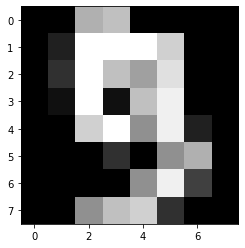

y = [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


In [7]:
# What is the 'digits' dataset?
from matplotlib import pyplot as plt
idx = 9
print(f'X[{idx}] = ')
plt.imshow(digits.images[idx], cmap='gray')
plt.show()
print(f'y = {y[:20]}')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [
  {'kernel': ['rbf'],
  'gamma': [1e-3, 1e-4],
  'C': [1, 10, 100, 1000]},
  
  {'kernel': ['linear'],
   'C': [1, 10, 100, 1000]},
]

metric = 'f1_macro'

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True)

grid_search = GridSearchCV(
    SVC(), tuned_parameters, scoring=metric, cv=cv_strategy
)
grid_search.fit(X_train, y_train);
print('Finished!')

Finished!


In [9]:
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [10]:
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:

0.984 (+/-0.026) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.955 (+/-0.036) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.026) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.024) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.026) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.978 (+/-0.024) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.026) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.978 (+/-0.024) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.970 (+/-0.023) for {'C': 1, 'kernel': 'linear'}
0.970 (+/-0.023) for {'C': 10, 'kernel': 'linear'}
0.970 (+/-0.023) for {'C': 100, 'kernel': 'linear'}
0.970 (+/-0.023) for {'C': 1000, 'kernel': 'linear'}


In [11]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       0.99      0.98      0.98        92
           3       1.00      0.99      0.99        93
           4       1.00      1.00      1.00        76
           5       0.99      0.98      0.99       108
           6       0.99      1.00      0.99        89
           7       0.99      1.00      0.99        78
           8       1.00      0.98      0.99        92
           9       0.99      0.99      0.99        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899




### (b) RandomGridSearchCV

Can we do better with a random search?

In [12]:
from sklearn.model_selection import RandomizedSearchCV

# How large is this parameter space?
tuned_parameters = [
  {'kernel': ['rbf'],
  'gamma': np.logspace(-3, -4, num=50),
  'C': np.logspace(0, 3, num=50)},
  
  {'kernel': ['linear'],
   'C': np.logspace(0, 3, num=50)},
]

grid_search = RandomizedSearchCV(
    SVC(), tuned_parameters, n_iter=12, scoring=metric, cv=cv_strategy, 
)
grid_search.fit(X_train, y_train);
print('Finished!')

Finished!


In [13]:
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)

Best parameters set found on development set:

{'kernel': 'rbf', 'gamma': 0.00040949150623804275, 'C': 120.67926406393289}


In [14]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       0.99      0.99      0.99        92
           3       0.99      0.99      0.99        93
           4       1.00      1.00      1.00        76
           5       0.96      0.98      0.97       108
           6       0.99      1.00      0.99        89
           7       1.00      1.00      1.00        78
           8       1.00      0.93      0.97        92
           9       0.98      0.98      0.98        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899




# [3] Dimensionality Reduction : PCA

### (a) Introduction

<img src = https://i.ibb.co/zh4q6Fb/pca.gif>

In [15]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

In [16]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [17]:
X.shape

(150, 4)

In [18]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [19]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [20]:
X_r.shape

(150, 2)

In [21]:
X_r[0]

array([-2.68412563,  0.31939725])

In [90]:
X_r

array([[ -1.25946648,  21.27488365],
       [  7.95761118, -20.76869879],
       [  6.99192304,  -9.95598671],
       ...,
       [ 10.80128375,  -6.96025215],
       [ -4.87210078,  12.42395372],
       [ -0.34438947,   6.36554917]])

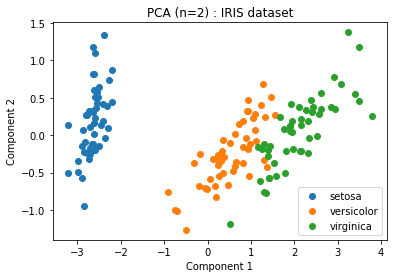

In [22]:
for i, target_name in enumerate(target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], label=target_name)

plt.legend(loc='best', scatterpoints=1)

plt.title('PCA (n=2) : IRIS dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.plot();

Explained variance ratio for the Principal Components

In [23]:
# Explained variance for each component (as %)
print('Explained variance ratio (first two components): ', pca.explained_variance_ratio_)

Explained variance ratio (first two components):  [0.92461872 0.05306648]


Explained variance ratio for the Principal Components for different 

In [24]:
for d in np.arange(X.shape[-1]):
  pca = PCA(n_components=d+1)
  X_r = pca.fit(X).transform(X)
  print('n_components = ',d+1)
  print('Explained variance ratio : ', pca.explained_variance_ratio_)

n_components =  1
Explained variance ratio :  [0.92461872]
n_components =  2
Explained variance ratio :  [0.92461872 0.05306648]
n_components =  3
Explained variance ratio :  [0.92461872 0.05306648 0.01710261]
n_components =  4
Explained variance ratio :  [0.92461872 0.05306648 0.01710261 0.00521218]


In [25]:
def plot_variance_explained(variance_explained):
  #variance_explained = np.sort(variance_explained)
  plt.figure(figsize=(10, 8))
  plt.plot(np.arange(1, len(variance_explained) + 1), np.cumsum(variance_explained),'--k')
  plt.xlabel('Number of components')
  plt.ylabel('Cumulative Explained Variance')
  plt.show()

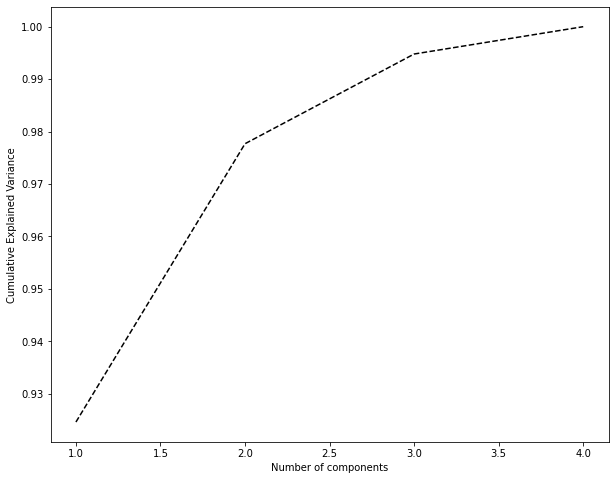

In [26]:
plot_variance_explained(pca.explained_variance_ratio_)

### (b) Number of components and Explained Variance

In [27]:
from sklearn import datasets

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

In [28]:
#@title PCA by Number of components { run: "auto", vertical-output: true }
n_components = 50 #@param {type:"slider", min:0, max:64, step:2}
pca = PCA(n_components=n_components)
X_r = pca.fit(X)
print('Cumulative Explained Variance = {:.3f}'.format(pca.explained_variance_ratio_.sum()))
print('\n Explained Variance Ratio = \n',(pca.explained_variance_ratio_))

Cumulative Explained Variance = 1.000

 Explained Variance Ratio = 
 [0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017718 0.00905617 0.00889538 0.00797123 0.00767493 0.00722904
 0.00695889 0.00596081 0.00575615 0.00515158 0.0048954  0.00428888
 0.00373606 0.00353274 0.00336684 0.0032803  0.00308321 0.00293779
 0.00256589 0.00227742 0.00222278 0.0021143  0.00189909 0.00158653
 0.0015116  0.00140579 0.00116622 0.00107493 0.00096405 0.00077463
 0.00055721 0.00040433]


In [29]:
#@title PCA by Explained Variance { run: "auto", vertical-output: true }
explained_variance = 0.25 #@param {type:"slider", min:0, max:0.95, step:0.05}

pca = PCA(n_components=explained_variance)
X_r = pca.fit(X).transform(X)

num_samples, dimension = X_r.shape

print('Number of components = ', dimension)


Number of components =  2


### (c) Visualizing using PCA

Transforming high dimensional data into 2 dimensions (also whitening)

In [30]:
pca = PCA(n_components=2, whiten=True, random_state=1)
X_r = pca.fit(X).transform(X)

Visualization of higher dimensional data

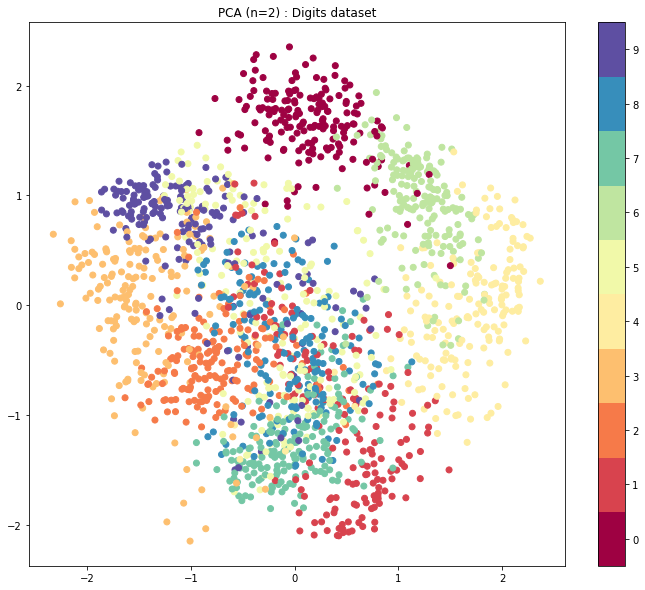

In [31]:
plt.figure(figsize=(12, 10))  

plt.scatter(X_r[:,0], X_r[:,1], c=y, cmap='Spectral')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('PCA (n=2) : Digits dataset')

plt.plot();

# [4] Clustering

## (a) K-Means

<img src='https://dashee87.github.io/images/kmeans.gif'>

Make synthetic dataset of 2D points using `make_blobs`

In [32]:
from sklearn.datasets import make_blobs

# Create blobs with 
X, y = make_blobs(n_samples=200, centers=4, cluster_std=1, random_state=1)

Visualize the dataset points by using `X` for point locations and `y` for ground truth labels indicated by the color.

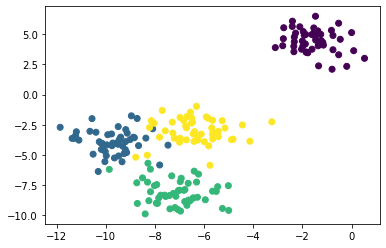

In [33]:
plt.scatter(X[:,0], X[:,1], c=y);

Visualize the dataset points by using only `X` 

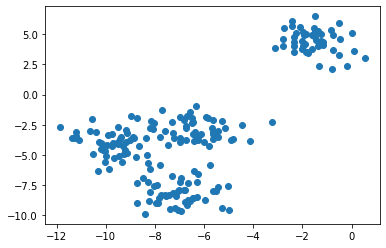

In [34]:
plt.scatter(X[:,0], X[:,1]);

Applying K-Means : This is the usual `sklearn` abstraction

In [35]:
from sklearn.cluster import KMeans

# Create the model
kmeans = KMeans(n_clusters=4)

# Fit the model
kmeans.fit(X)

# Predict using the model 
cluster_labels = kmeans.labels_   #Same as cluster_labels because X is the training data

**Remark** : The K-Means model uses only the `X` of the dataset.The true labels `y` are not used as they are considered unknown.

Get the cluster labels of the points trained

In [36]:
cluster_labels   #Alternatively : kmeans.predict(X) 

array([3, 0, 1, 1, 3, 0, 0, 0, 1, 2, 0, 2, 1, 2, 3, 1, 3, 1, 3, 1, 3, 3,
       1, 0, 3, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 3, 1, 3, 1, 2, 2, 2, 0, 0,
       1, 1, 0, 1, 2, 0, 3, 1, 3, 0, 1, 1, 2, 2, 3, 0, 0, 1, 2, 2, 3, 3,
       2, 3, 1, 3, 3, 0, 2, 1, 0, 2, 2, 1, 1, 1, 3, 0, 1, 1, 2, 3, 2, 0,
       1, 1, 2, 3, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 3, 0, 3, 3, 1, 2, 1, 0,
       2, 1, 0, 0, 2, 0, 0, 3, 0, 2, 2, 2, 2, 3, 3, 0, 2, 3, 3, 3, 0, 2,
       1, 0, 0, 1, 1, 1, 0, 0, 3, 2, 3, 0, 1, 1, 3, 3, 0, 3, 1, 0, 0, 2,
       0, 2, 3, 0, 2, 0, 3, 2, 2, 0, 1, 2, 2, 3, 1, 0, 2, 3, 1, 1, 0, 3,
       0, 0, 2, 2, 3, 2, 0, 0, 1, 2, 3, 0, 2, 2, 3, 3, 3, 1, 0, 1, 1, 2,
       3, 1], dtype=int32)

View the cluster centers of the trained model

In [37]:
kmeans.cluster_centers_

array([[-1.54465562,  4.4600113 ],
       [-7.03925738, -8.12235782],
       [-9.74296129, -4.04838373],
       [-6.3414962 , -2.89069409]])

Visualized the trained 

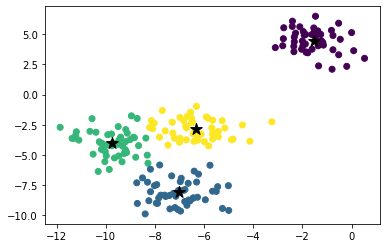

In [38]:
# Plotting the points colored by the predicted cluster_labels

plt.scatter(X[:,0], X[:,1], c=cluster_labels)

# Plotting the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', marker='*', s=150);

Let us compare with the points visualized with the original labels `y`

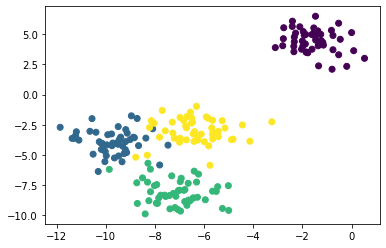

In [39]:
plt.scatter(X[:,0], X[:,1], c=y);

Making a cluster label prediction for a sample

In [40]:
kmeans.predict(np.array([[-5,-5]])) 

array([3], dtype=int32)

Making a cluster label predictions for multiple samples


In [41]:
kmeans.predict(np.array([[-5,-5],[0,0]])) 

array([3, 0], dtype=int32)

Get validation/test score : the value of the K-means objective function

In [42]:
kmeans.score(np.array([[-5,-5]]))

-6.248783500162023

##(b) Hierarchical Clustering

<img src='https://dashee87.github.io/images/hierarch.gif'>

Load dataset of customers into a dataframe

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/customers.csv')
df.head()

,id,fruits,milk,cereal,frozen,detergents,misc
0,0,11.296377,13.137772,8.149386,0.351575,6.549587,2.790814
1,1,6.292409,13.347302,10.312567,2.894741,8.065741,3.704399
2,2,5.664684,11.984000,8.281957,3.951108,8.611948,16.361095
3,3,11.827804,1.627255,4.549472,10.520955,1.241825,3.729429
4,4,20.164778,7.360745,7.758138,6.431845,4.352512,10.814926


Drop the `id` column

In [44]:
df.drop('id', inplace=True, axis=1)

Visualize the dendrogram of the data : [Scipy Dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

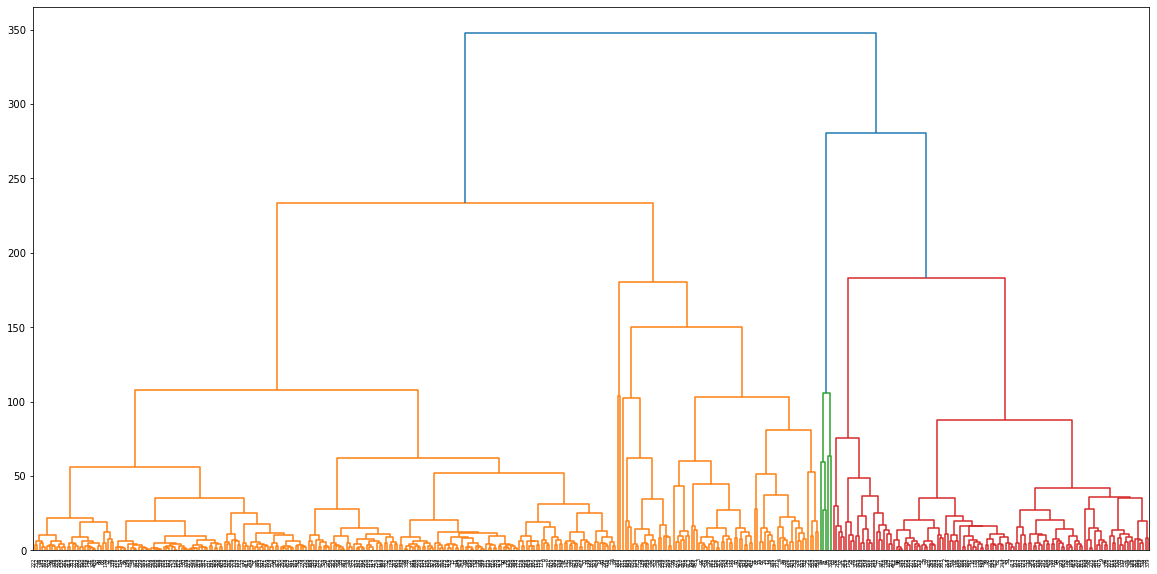

In [45]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 10))  
shc.dendrogram(shc.linkage(df, method='ward'));

We see there are three (potential) clusters

Let us train an `AgglomerativeClustering` model for this dataset with 3 clusters.

In [46]:
from sklearn.cluster import AgglomerativeClustering

# Create the model
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')  

# Fit the model and predict the cluster labels
cluster.fit_predict(df)

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

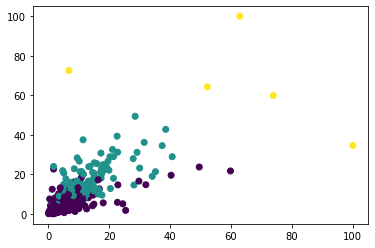

In [47]:
plt.scatter(df['milk'], df['cereal'], c=cluster.labels_);

# [5] Pipelining

Pipeline can be used to chain multiple estimators into one. 

This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:

* *Convenience and encapsulation* - need to call fit and predict once on your data

* *Joint parameter selection* - can do grid search over parameters of all estimators at once.

* *Safety* - Avoid leaking statistics from your test data into the trained model in cross-validation


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)

pipe = Pipeline(steps=[
  ('pca', pca),
  ('logistic', logistic)
])

X, y = datasets.load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train);

In [49]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.967):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 64}


In [50]:
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       0.99      0.99      0.99        92
           3       0.99      0.99      0.99        93
           4       1.00      1.00      1.00        76
           5       0.96      0.98      0.97       108
           6       0.99      1.00      0.99        89
           7       1.00      1.00      1.00        78
           8       1.00      0.93      0.97        92
           9       0.98      0.98      0.98        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899



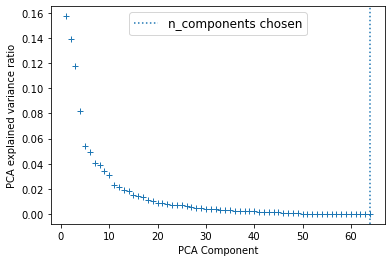

In [51]:
# Plot the PCA spectrum
pca.fit(X_train)


plt.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
plt.ylabel('PCA explained variance ratio')
plt.xlabel('PCA Component')

plt.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12));

In [52]:
pipe.fit(X_test, y_test)

Pipeline(steps=[('pca', PCA()),
                ('logistic', LogisticRegression(max_iter=10000, tol=0.1))])

#[6] Statistical Inference : Bootstrapping and Confidence Intervals (CI)

##(a) Accuracy CI of a simple classifier 

In [53]:
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [54]:
data = pd.read_csv('https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/diabetes.csv', header=None)
values = data.values

In [55]:
values.shape

(768, 9)

In [56]:
values[0] # 8 features ---> 1 output label (0/1)

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ,   1.   ])

Sklearn function used in bootstrapping : `resample()` [See documentation](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html)

In [57]:
# Bootstrap configuration
num_iterations = 1000
num_samples = int(len(data)/ 2)    # Pick a training set with size of 50% of the dataset

In [58]:
# Run the bootstrap

scores = []

for i in range(num_iterations):
  
  # Prepare train and test sets
  train = resample(values, n_samples=num_samples)
  test = pd.concat([data,pd.DataFrame(train)]).drop_duplicates(keep=False).values            #Consider all the samples other than those in the train set as test set
 
	# Fit model
  model = DecisionTreeClassifier()
  model.fit(train[:,:-1], train[:,-1])
	
  # Evaluate model
  predictions = model.predict(test[:,:-1])
  score = accuracy_score(test[:,-1], predictions)

  scores.append(score)

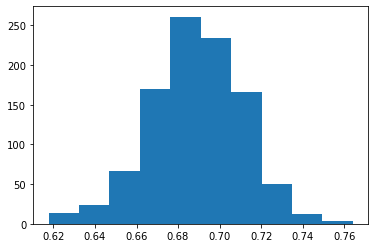

In [59]:
# plot scores
plt.hist(scores);

In [60]:
# Confidence interval

confidence_percentage = 95

# p-values
p = (100-confidence_percentage)/2 

# Quartiles
lower = max(0.0, np.percentile(scores, p))
upper = min(1.0, np.percentile(scores, 100 - p))

print('Classifier Accuracy : ({:d}%) confidence interval = [{:.1f}%,{:.1f}%]'.format(int(confidence_percentage), lower*100, upper*100))

Classifier Accuracy : (95%) confidence interval = [64.2%,73.0%]


Visualizing the interval on the bootstrap results

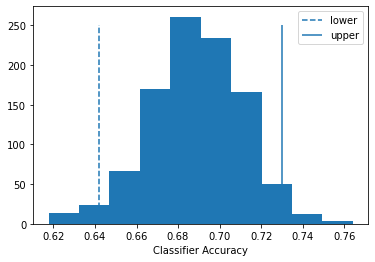

In [61]:
plt.vlines(lower,0,250, linestyles='--', label='lower')
plt.vlines(upper,0,250, label='upper')
plt.xlabel('Classifier Accuracy')
plt.legend(loc='best')
plt.hist(scores);

##(b) Visualization of CI of a Linear Regressor

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
num_iterations = 1000

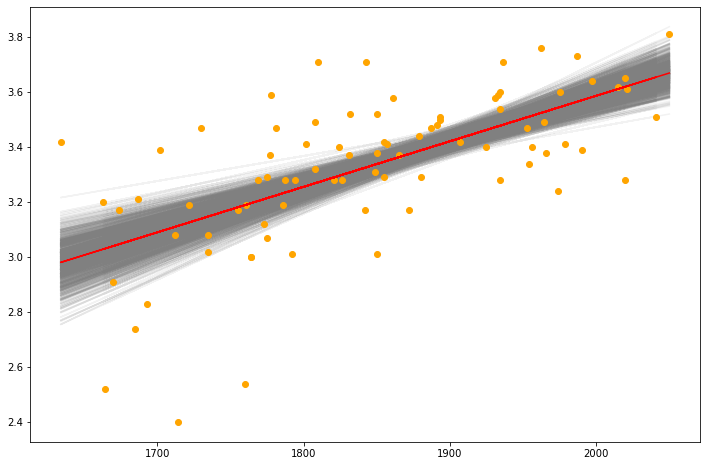

In [64]:

# Load data into dataframe
sat_gpa = pd.read_csv('https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/sat-gpa.csv')
X,y = sat_gpa.SAT.values, sat_gpa.GPA.values 

# Reshape X to prepare it for regression
X = X.reshape(-1,1)

plt.figure(figsize=(12,8))


# Bootstrapping loop
for i in range(0, num_iterations):
 
    sampled_index = np.random.choice(range(0, len(y)), len(y))

    X_samples = X[sampled_index]
    y_samples = y[sampled_index]    

    lr = LinearRegression()
    lr.fit(X_samples, y_samples)
    plt.plot(X, lr.predict(X), color='grey', alpha=0.1, zorder=1)

# Plot the data points
plt.scatter(X,y, marker='o', color='orange', zorder=4)

# Fit Regression model for the entre data
lr = LinearRegression()
lr.fit(X, y)
plt.plot(X, lr.predict(X), color='red', zorder=5);

In [65]:
lr.coef_

array([0.00165569])

In [66]:
lr.intercept_

0.2750402996602803

Observe the extent of the slope of the regression line in the plot as defined by the bootstrapped regression lines.

If you like to explore more quantitatively :  

In [67]:
from scipy.stats import linregress

X,y = sat_gpa.SAT.values, sat_gpa.GPA.values 
slope, intercept, r, p, stderr = linregress(X.squeeze(),y)

# EXERCISES

### Import

In [68]:
import sklearn

#Other imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Cross-Validation

On the digits dataset, plot the cross-validation score of a SVC estimator with an linear kernel as a function of parameter C (use the values of C provided).

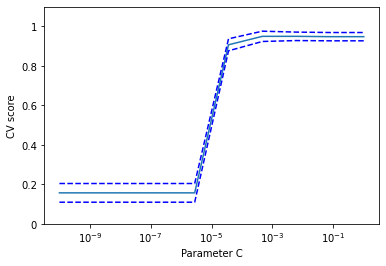

In [69]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

X, y = datasets.load_digits(return_X_y=True)

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt
plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

### 2. GridSearch

On the diabetes dataset, find the optimal regularization parameter alpha.

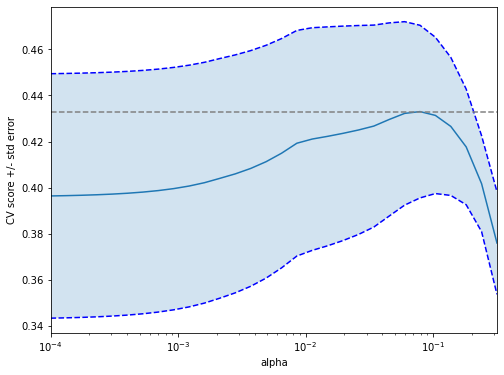

In [70]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]]);

### 3. Pipelines

Understand the following piece of code and re-write the same in the cell given below using a sklearn `Pipeline`.

In [71]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier

# Toy dataset
Xtrain = ["Hello, world!", "Bonjour, hi"]
ytrain = [1, 2]
Xtest = ["foo bar baz", "testing"]
ytest = [1, 2]

# Sample code (too long, too complicated!). Re-write this:
vect = CountVectorizer()
tfidf = TfidfTransformer()
clf = SGDClassifier()

vX = vect.fit_transform(Xtrain)
tfidfX = tfidf.fit_transform(vX)
clf.fit(tfidfX, ytrain)

vX = vect.transform(Xtest)
tfidfX = tfidf.transform(vX)
predicted = clf.predict(tfidfX)

Answer  : Rewritten code with `Pipeline`

In [72]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])
pipeline.fit(Xtrain, ytrain)
predicted = pipeline.predict(Xtest)

### 4. PCA

Load the dataset with labels as given in the next cell. 

(a) Determine how many components you would need to include to have atleast 85% explained variance.

(b) When reducing this data to 3 dimensions, what amount of variance is explained by the components?

(c) Plot the reduced dimensions using a [3D scatter plot](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) so as to reveal some structure of the data.

In [73]:
from sklearn.datasets import make_blobs

# Load dataset 
X, y = make_blobs(n_samples=500, n_features=25, centers=6, cluster_std=3, random_state=1)

(a)

In [74]:
from sklearn.decomposition import PCA

for n in np.arange(25):
  pca = PCA(n_components=n).fit(X)
  exp_vars = pca.explained_variance_ratio_
  total_exp_var = exp_vars.sum()

  if total_exp_var >= 0.85:
    break

print('Number of components required for 85% explained variance = ',n)

Number of components required for 85% explained variance =  8


(b)

In [75]:
pca = PCA(n_components=3)
pca.fit(X)
print('Component-wise Variance explained = ',pca.explained_variance_ratio_)
print('         Total Variance explained = ',pca.explained_variance_ratio_.sum())

Component-wise Variance explained =  [0.22163041 0.19656311 0.16579207]
         Total Variance explained =  0.5839855840173069


(c) 

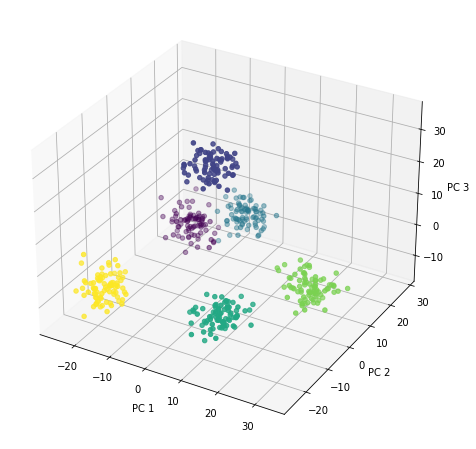

In [76]:
from mpl_toolkits.mplot3d import Axes3D

# Get the dimensionality reduced points of X by applying transform() on the fitted PCA model
X_r = pca.transform(X)

# Configure the figure and axes for 3D plotting
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter the points by giving the x, y, z coordinates as separate arrays and color to be taken from the y label 
ax.scatter(X_r[:,0],X_r[:,1],X_r[:,2], c=y)

# Label the axes to identify the PCs
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

Notice here that the dataset created by making 6 blobs in 25-dimensional space retai  their proximity and clustering even in 3 dimensions after they were reduced dimensions using PCA.

### 5. Clustering

Consider the PCA(n=2) reduced data of the Digits dataset as shown in Section 3(c). 

(a) Split the dataset into train and validation sets. Apply K-means to this data and compute the `score()` for values of k from 1 to 15.  Using these scores, determine the value of `k` for which the model fits the data better.

(b) Now use the entire dataset and fit a K-Means model with `k=10`. Plot the scatter plots to visualize the clusters for all points in the dataset. How does it compare with the PCA scatter plot? 

(c) Generate the dendrogram for the dataset and see how many significant clusters emerge. Where do you have to make a cut in order to obtain 10 clusters?   

(d) Try fitting a Hierarchical clustering model with 10 clusters and produce the scatter plot.

Think if everything syncs in with your notions about dimensionality reduction and clustering.

In [77]:
from sklearn import datasets
from sklearn.decomposition import PCA

# Create dataset to use : PCA(n=2) reduced digits
digits = datasets.load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [78]:
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

X_train, X_valid = train_test_split(X_r, test_size=0.33, random_state=1)

In [79]:
valid_scores = []

for k in np.arange(1,16):

  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_train)
  valid_scores.append(kmeans.score(X_valid))

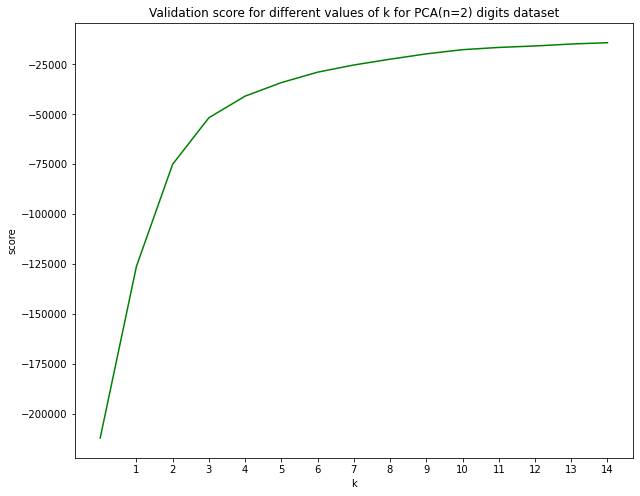

In [80]:
# Plotting the validation scores 

plt.figure(figsize=(10,8))

plt.plot(valid_scores, c='g')
plt.xticks(np.arange(1,17))
plt.xlabel('k')
plt.ylabel('score')
plt.title('Validation score for different values of k for PCA(n=2) digits dataset')
plt.plot();

Look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to understand the `score` returned for K-Means. It is as actually the negative of the minimization objective function.

This means that for this score, **higher is better**. We see the score increasing with increasing $k$ values and plateaus around 10. This is as expected as the actual dataset has 10 clusters. 

Thus a values of $k=10$ is better than all lower values and as good as all the higher values of $k$. 

(b)

In [81]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_r)
cluster_labels = kmeans.labels_

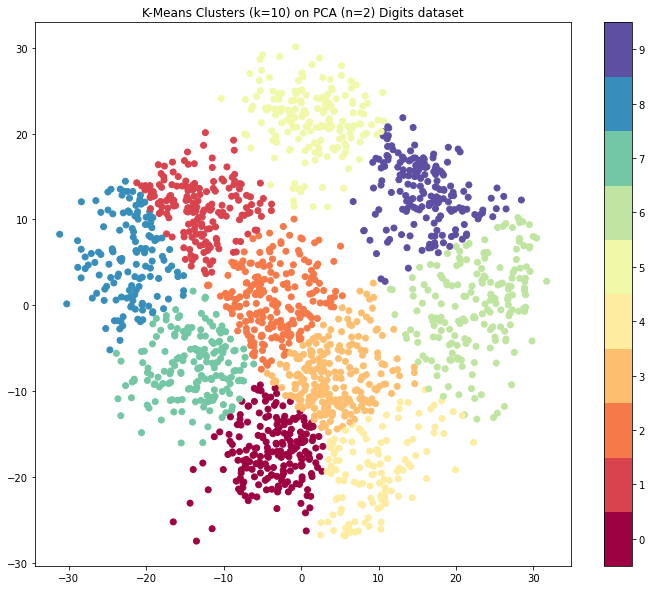

In [82]:
# Plotting only the K-Means clusters

plt.figure(figsize=(12, 10))  

plt.scatter(X_r[:,0], X_r[:,1], c=cluster_labels, cmap='Spectral')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('K-Means Clusters (k=10) on PCA (n=2) Digits dataset')

plt.plot();

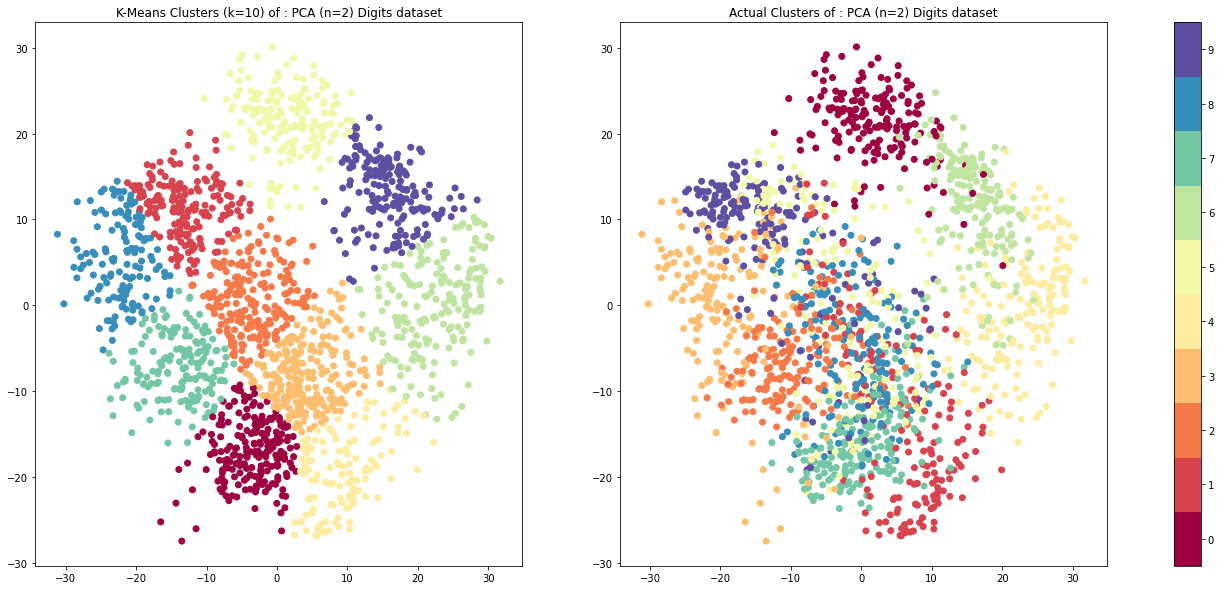

In [83]:
# Plotting both the K-Means clusters and actual clusters side by side.
  
fig, ax = plt.subplots(1, 2, figsize=(24,10))

ax[0].scatter(X_r[:,0], X_r[:,1], c=cluster_labels, cmap='Spectral')
ax[0].set_title('K-Means Clusters (k=10) of : PCA (n=2) Digits dataset')

image = ax[1].scatter(X_r[:,0], X_r[:,1], c=y, cmap='Spectral')
ax[1].set_title('Actual Clusters of : PCA (n=2) Digits dataset')

# Create and place colorbar
cbar = fig.colorbar(image, ax=ax, boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))

plt.plot();

**Remark** : The cluster labels (as integers between 0-9) are do not mean the same thing in both the plots. On the left it is based on the order of clusters discovered by the K-Means algorithm. Whereas on the right, it corresponds to the *actual labels* of the digit from the dataset. Although the numbers indicated for the clusters are not the same, the clusters overall are comparable.   

Compared to the PCA scatter plot (which contains the actual labels from the dataset [y]), the points on the K-Means plot are labelled by the clusters estimated by the K-Means algorithm. As specified, K-Means has assumed 10 clusters and assigned each point to a cluster.  

**Differences**
* We can see some correspondance among the clusters identified by K-Means (left) and the actual clusters (right).
* K-Means (left) has created more non-overlapping clusters (with clear boundaries) compared to the actual clusters (right).
* The clusters are more or less similar for the most of the actual labels except "8" (and "7"?).
* The actual cluster "8" has most mixing with the other types while K-Means has clustered its whole neighborhood into one cluster.

The K-Means seems to have actually created clusters by cutting the data space into equal parts like a birthday cake, while the actual clusters seem like a trail mix for the most part! :P





(c)

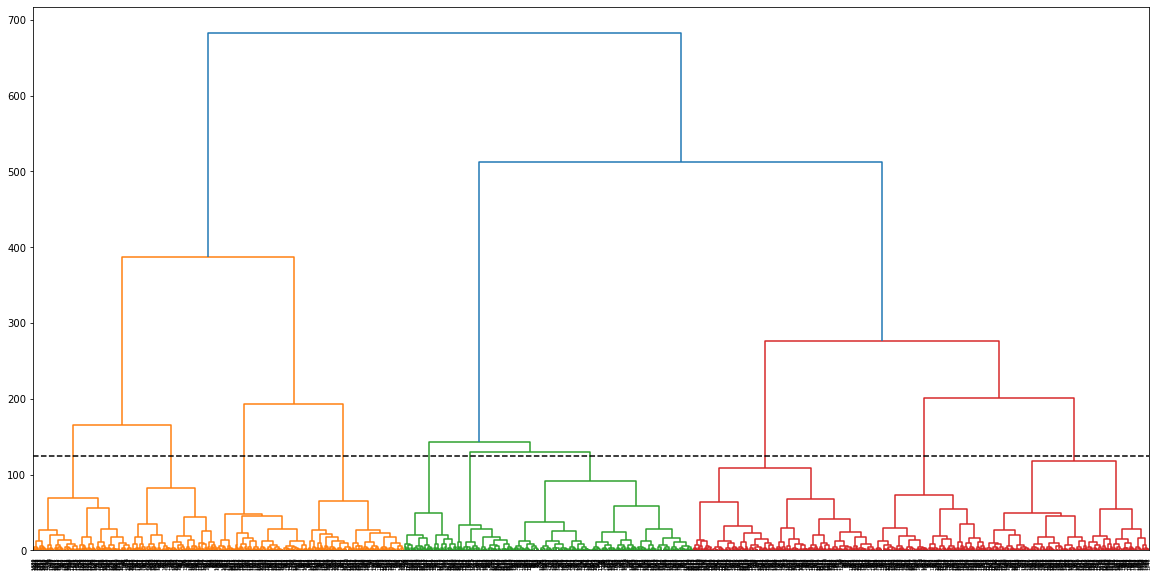

In [84]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 10))  
shc.dendrogram(shc.linkage(X_r, method='ward'));
plt.axhline(c='black',linestyle='--', y=125) 
plt.show()

* From the dendrogram, we can see that 3 significant clusters emerge in the dataset (as given by the coloring).
* Making a cut at around a distance of $y=125$ gives 10 clusters.

(d)

In [85]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, linkage='ward')  
hier_cluster_labels = cluster.fit_predict(X_r)

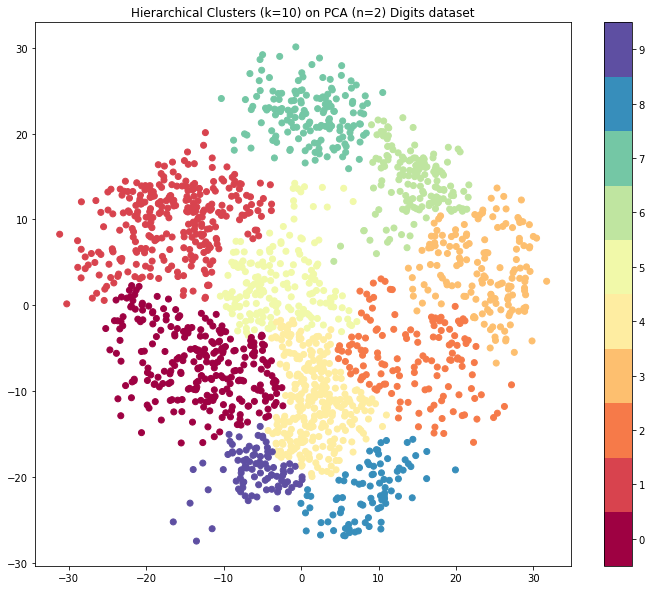

In [86]:
# Plotting the Hierarchical clusters

plt.figure(figsize=(12, 10))  

plt.scatter(X_r[:,0], X_r[:,1], c=hier_cluster_labels, cmap='Spectral')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Hierarchical Clusters (k=10) on PCA (n=2) Digits dataset')

plt.plot();

We see that hierarchical clustering still produces clustering that is different from the actual clustering but somewhat similar to the K-Means, except for the clusters in the middle.

### 6. Bootstrapping

As shown in Section 6(a), for the Iris dataset, using bootstrap estimate the confidence interval for the classification accuracy of various kNN models with different values of `k = 1, 4, 8, 16` respectively.

In [87]:
from sklearn import datasets

# Load dataset to use : PCA(n=2) reduced digits
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [88]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

k_values = [1,4,8,16]

# Bootstrap configuration
num_iterations = 1000
num_samples = int(len(X)/ 2)


all_scores = []

for k in k_values:
  scores = []

  for i in range(0, num_iterations):

    # Bootstrap samples
    X_train, y_train = resample(X, y, n_samples=num_samples, random_state=i)

    # Fit model
    knn = KNN(k)
    knn.fit(X_train,y_train)
  
    # Predict and evaluate
    predictions = knn.predict(X)
    score = accuracy_score(y, predictions)

    scores.append(score)

  all_scores.append(np.array(scores))

In [89]:
# Confidence interval

percentage_CI = 95
  
for k,scores in zip(k_values,all_scores):
  percentile = (100-percentage_CI)/2 
  lower, upper = np.percentile(scores, percentile), np.percentile(scores, 100 - percentile)
  print('95% CI for (k = {:2d}) : [{:.4f},{:.4f}]'.format(k,lower,upper))   

95% CI for (k =  1) : [0.9467,0.9867]
95% CI for (k =  4) : [0.9133,0.9800]
95% CI for (k =  8) : [0.9067,0.9800]
95% CI for (k = 16) : [0.9000,0.9733]


Replace the `random_state` value in `resample()` with a constant value = 1. Rerun the cells and find the CIs again. 

What do you observe? Can you understand what changed and what happened?

Bonus Exercises to try

https://github.com/mpfrush/Python-Scikit-Learn-Exercises/

# REFERENCES

1. https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html
2. https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
3. https://stackoverflow.com/questions/33091376/python-what-is-exactly-sklearn-pipeline-pipeline
4. https://scikit-learn.org/stable/modules/cross_validation.html
5. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
6. https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019
7. https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/
8. https://towardsdatascience.com/how-to-perform-linear-regression-with-confidence-5ed8fc0bb9fe

## Cheatsheet:
1. https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf
2. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html